In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from ml import Ml
from preprocess import Preprocess
from clean_data import CleanData
from plot import Plot

In [39]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [2]:
train_store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\train_store.csv', engine = 'python')

In [41]:
test = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\test.csv',sep=',', parse_dates=['Date'], index_col = 'Date')

In [3]:
ml = Ml()
clean = CleanData()
pt = Plot()
pre = Preprocess()

In [4]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 23 columns):
Unnamed: 0                   844338 non-null int64
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null object
SchoolHoliday                844338 non-null int64
Year                         844338 non-null int64
Month                        844338 non-null int64
Day                          844338 non-null int64
WeekOfYear                   844338 non-null int64
SalePerCustomer              844338 non-null float64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          844338 non-null float64
CompetitionOpen

In [5]:
train_store.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
numr_col = pre.get_numerical_columns(train_store)
print("the numeric columns are",numr_col)

the numeric columns are ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'SalePerCustomer', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [7]:
cat_col = pre.get_categorical_columns(train_store)
print("the Categorial columns are",cat_col)

the Categorial columns are ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


In [8]:
pre.get_missing_values(train_store)

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
SalePerCustomer              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# the missing values had been dealt on the Clean notebook

# extracting new columns

In [9]:
# df2 = df.query("DayOfWeek == 6")
# df2
### extracting new column on weekends
train_store = train_store.assign(weekends = ((train_store.DayOfWeek ==6) | (train_store.DayOfWeek == 7)))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False


In [10]:
### extracting new column on weekdays
train_store = train_store.assign(weekdays = ((train_store.DayOfWeek !=6) & (train_store.DayOfWeek != 7)))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True


In [11]:
### extracting new column on number of days to holidays
train_store = train_store.assign(number_of_days_to_holidays = (len(train_store.StateHoliday =='0')/len(train_store.StateHoliday != '0')))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True,1.0
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True,1.0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True,1.0
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True,1.0
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True,1.0
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True,1.0


In [ ]:
### extracting new column on number of days after holidays
train_store = train_store.assign(number_of_days_to_holidays = (len(train_store.StateHoliday =='0')/len(train_store.StateHoliday != '0')))
train_store

In [12]:
### extracting new column on Beginning of month, mid month and ending of month
train_store = train_store.assign(beginning_of_month = (train_store.Day < 10) & (train_store.Day >= 1))
train_store = train_store.assign(mid_of_month = (train_store.Day < 20) & (train_store.Day >= 10))
train_store = train_store.assign(end_of_month = (train_store.Day <= 31) & (train_store.Day >= 20))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0,False,False,True
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,False,True
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,False,True
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True,1.0,False,False,True
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True,1.0,True,False,False
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True,1.0,True,False,False
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True,1.0,True,False,False
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True,1.0,True,False,False


### I have add extracted the following new columns 
- by years
- by days
- by weeks
- by weekdays
- by weekends
- by salespercustomer
- by beginning, mid and end of the year
- by number_of_days_to_holidays
- by number_of_days_after_holidays

In [13]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 28 columns):
Store                         844338 non-null int64
DayOfWeek                     844338 non-null int64
Sales                         844338 non-null int64
Customers                     844338 non-null int64
Open                          844338 non-null int64
Promo                         844338 non-null int64
StateHoliday                  844338 non-null object
SchoolHoliday                 844338 non-null int64
Year                          844338 non-null int64
Month                         844338 non-null int64
Day                           844338 non-null int64
WeekOfYear                    844338 non-null int64
SalePerCustomer               844338 non-null float64
StoreType                     844338 non-null object
Assortment                    844338 non-null object
CompetitionDistance           844338 non-null float64
CompetitionOpenSinceMonth     844338 non-null floa

In [15]:
# df.drop('auction_id', axis=1, inplace=True)
numerical_column = train_store.select_dtypes(exclude=["object", "bool"]).columns.tolist()
bool_col = train_store.select_dtypes(include=["bool"]).columns.tolist()
categorical_column = train_store.select_dtypes(include=["object"]).columns.tolist()

In [16]:
numerical_column

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'SalePerCustomer',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'number_of_days_to_holidays']

In [17]:
categorical_column

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [18]:
for i in range(len(bool_col)):
    train_store[bool_col[i]] = train_store[bool_col[i]].replace({True: 1, False: 0})

In [19]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,1.0,0,0,1
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,1,1.0,0,0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,1.0,0,0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,1.0,0,0,1
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,0,1,1.0,1,0,0
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,0,1,1.0,1,0,0
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",0,1,1.0,1,0,0
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,0,1,1.0,1,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in categorical_column if train_store[col].nunique() <= 10]
one_hot_encoded_columns = pd.get_dummies(train_store[to_one_hot_encoding])
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,1.0,0,0,1
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,1,1.0,0,0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,1.0,0,0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,1.0,0,0,1
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,0,1,1.0,1,0,0
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,0,1,1.0,1,0,0
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",0,1,1.0,1,0,0
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,0,1,1.0,1,0,0


In [21]:
one_hot_encoded_columns

,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
844334,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
844335,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
844336,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [22]:
train_store.drop(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], axis=1, inplace=True)
train_store = pd.concat([train_store, one_hot_encoded_columns], axis=1)
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,31,9.482883,1270.0,9.0,2008.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,2015,7,31,31,9.702400,570.0,11.0,2007.0,1,13.0,2010.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,3,5,8314,821,1,1,1,2015,7,31,31,10.126675,14130.0,12.0,2006.0,1,14.0,2011.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,4,5,13995,1498,1,1,1,2015,7,31,31,9.342457,620.0,9.0,2009.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,5,5,4822,559,1,1,1,2015,7,31,31,8.626118,29910.0,4.0,2015.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1,2013,1,1,1,5.962898,150.0,9.0,2006.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
844334,733,2,10765,2377,1,0,1,2013,1,1,1,4.528818,860.0,10.0,1999.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
844335,769,2,5035,1248,1,0,1,2013,1,1,1,4.034455,840.0,0.0,0.0,1,48.0,2012.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
844336,948,2,4491,1039,1,0,1,2013,1,1,1,4.322425,1430.0,0.0,0.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [23]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 39 columns):
Store                             844338 non-null int64
DayOfWeek                         844338 non-null int64
Sales                             844338 non-null int64
Customers                         844338 non-null int64
Open                              844338 non-null int64
Promo                             844338 non-null int64
SchoolHoliday                     844338 non-null int64
Year                              844338 non-null int64
Month                             844338 non-null int64
Day                               844338 non-null int64
WeekOfYear                        844338 non-null int64
SalePerCustomer                   844338 non-null float64
CompetitionDistance               844338 non-null float64
CompetitionOpenSinceMonth         844338 non-null float64
CompetitionOpenSinceYear          844338 non-null float64
Promo2                            844338 

In [26]:
pre.get_missing_values(test)

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [30]:
train_store.shape
test.shape

(41088, 8)

In [31]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'weekends', 'weekdays', 'number_of_days_to_holidays',
       'beginning_of_month', 'mid_of_month', 'end_of_month', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [34]:
# merging same columns together that has no impact on training
train_store['CompetitionOpenSince'] = np.where((train_store['CompetitionOpenSinceMonth']==0) & (train_store['CompetitionOpenSinceYear']==0) , 
                                        0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (train_store.Year - train_store.CompetitionOpenSinceYear)) )

In [36]:
# getting red of CompetitionOpenSinceYear and CompetitionOpenSinceMonth since they have been merged the merged columns
del train_store['CompetitionOpenSinceYear']
del train_store['CompetitionOpenSinceMonth']

In [43]:
train_store.shape

(844338, 38)

In [44]:
# data extraction
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear

In [45]:
test.shape

(41088, 11)

In [47]:
def loss_func(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**.5
    return mse, rmse

In [70]:
features = train_store.drop(['Customers', 'Sales', 'SalePerCustomer'], axis = 1) 
col_name = features.columns.tolist()
targets=np.log(train_store.Sales)
col_name

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionDistance',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'weekends',
 'weekdays',
 'number_of_days_to_holidays',
 'beginning_of_month',
 'mid_of_month',
 'end_of_month',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'CompetitionOpenSince']

In [66]:
X_train, X_train_test, y_train, y_train_test = train_test_split(features, targets, test_size=0.20, shuffle=False)
print ("Training and testing split was successful.")

Training and testing split was successful.


# buliding a Pipeline

In [67]:
# bulid a pipeline
model_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor(n_estimators=10, 
                             criterion='mse', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                            ))])
model_pipeline.fit(X_train, y_train)



# std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(train_store)
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=5, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score
y_pred = model_pipeline.predict(X_train_test)
mse, rmse = loss_func(y_train_test, y_pred)
print("the mse is {} and rmse {}".format(mse, rmse))

the mse is 0.14351661943362354 and rmse 0.37883587400564844


In [78]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=6003 sha256=360d36862a7fcb3cd9e21fcd8166be3856d77cb42f0a547f7ba3eea9598f0b67
  Stored in directory: C:\Users\sam\AppData\Local\pip\Cache\wheels\cd\05\42\71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [80]:
# Pickle to serialize and deserialize
# import Pickle
# pickle.dump(model, open('..models/model.pkl', 'wb'))# reconstructed = pickle.loads(pickled_model)
from sklearn.externals import joblib
joblib.dump(model_pipeline , '..models/model_jlib')

FileNotFoundError: [Errno 2] No such file or directory: '..models/model_jlib'

Store , Score: 0.01099
DayOfWeek , Score: 0.08470
Open , Score: 0.00000
Promo , Score: 0.59664
SchoolHoliday , Score: 0.00000
Year , Score: 0.00000
Month , Score: 0.01933
Day , Score: 0.00164
WeekOfYear , Score: 0.03515
CompetitionDistance , Score: 0.06394
Promo2 , Score: 0.00000
Promo2SinceWeek , Score: 0.00930
Promo2SinceYear , Score: 0.04613
weekends , Score: 0.00289
weekdays , Score: 0.00210
number_of_days_to_holidays , Score: 0.00000
beginning_of_month , Score: 0.00220
mid_of_month , Score: 0.00020
end_of_month , Score: 0.00000
StateHoliday_0 , Score: 0.00000
StateHoliday_a , Score: 0.00000
StateHoliday_b , Score: 0.00000
StateHoliday_c , Score: 0.00000
StoreType_a , Score: 0.00000
StoreType_b , Score: 0.03814
StoreType_c , Score: 0.00000
StoreType_d , Score: 0.00077
Assortment_a , Score: 0.07660
Assortment_b , Score: 0.00000
Assortment_c , Score: 0.00068
PromoInterval_0 , Score: 0.00000
PromoInterval_Feb,May,Aug,Nov , Score: 0.00000
PromoInterval_Jan,Apr,Jul,Oct , Score: 0.00000


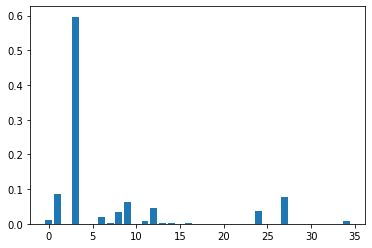

In [74]:
importance = model_pipeline.named_steps["model"].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[i], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## we can see the Promo was a big factor on tne training

In [80]:
df_scaled.to_csv('../data/scaled_data.csv')
